# Задание 1

1. Взять датасет Mortality and Water Hardness
2. Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
df_water = pd.read_csv ('/Users/viktoria/Documents/Netology/theory/13_Correlation/water.csv')
df_water.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

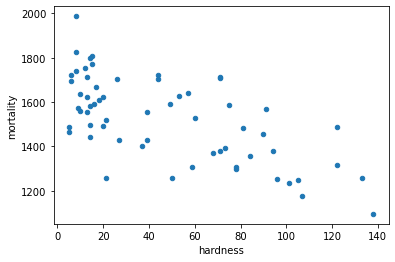

In [4]:
df_water.plot(kind='scatter', x='hardness', y='mortality') # точечный график

In [5]:
df_water[['hardness', 'mortality']].corr() # коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
df_water[['hardness', 'mortality']].corr(method='spearman') # коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


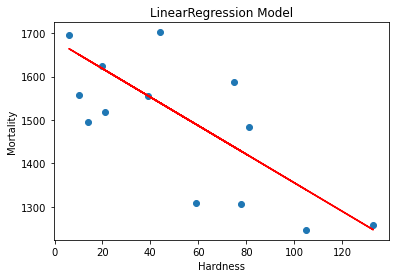

In [31]:
X = df_water[['hardness']]
y = df_water['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.title('LinearRegression Model')
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.plot(X_test, y_pred, c='r') # модель линейной регрессии

In [32]:
model.score(X_test, y_test) # коэффициент детерминации

0.5099679408034544

Text(0, 0.5, 'Residuals')

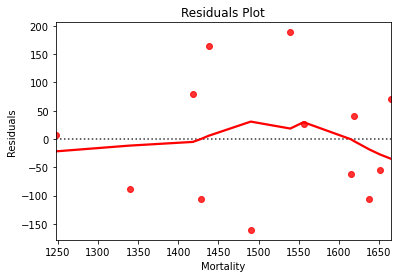

In [33]:
sns.residplot(x=y_pred, y=y_test, lowess=True, color="r") # график остатков
plt.title('Residuals Plot')
plt.xlabel('Mortality')
plt.ylabel('Residuals')

Ответ: прослеживается слабая обратная зависимость между жёсткостью воды и средней годовой смертностью, т.е. в некоторых городах Англии и Уэльса при низкой жесткости воды средняя годовая смертность высокая. В целом, есть предположение, что смертность в городах связана с иным, не представленным в таблице параметром.

# Задание 2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [10]:
df_water_north = df_water.loc[df_water['location'] == 'North']
df_water_south = df_water.loc[df_water['location'] == 'South']

### Анализ северных городов 

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

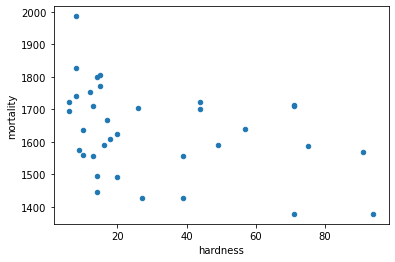

In [11]:
df_water_north.plot(kind='scatter', x='hardness', y='mortality') # точечный график

Точечный график иллюстрирует отсутствие в северных городах зависимости между жёсткостью воды и средней годовой смертностью. Видно, что в целом городов с низкой жесткостью воды больше, и они имеют различные значения средней годовой смертности.

In [12]:
df_water_north[['hardness', 'mortality']].corr() # коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [13]:
df_water_north[['hardness', 'mortality']].corr(method='spearman') # коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


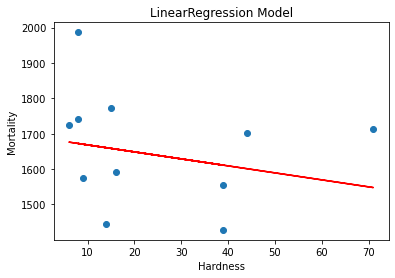

In [42]:
X_n = df_water_north[['hardness']]
y_n = df_water_north['mortality']

Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.30, random_state=42)

model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

yn_pred = model_n.predict(Xn_test)

plt.scatter(Xn_test, yn_test)
plt.title('LinearRegression Model')
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.plot(Xn_test, yn_pred, c='r') # модель линейной регрессии

In [43]:
model_n.score(Xn_test, yn_test) # коэффициент детерминации

0.018885304285745863

Text(0, 0.5, 'Residuals')

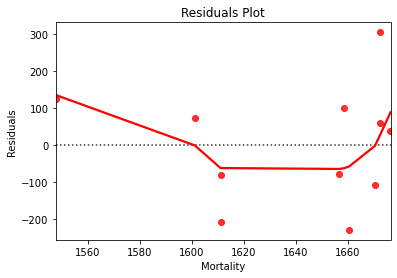

In [44]:
sns.residplot(x=yn_pred, y=yn_test, lowess=True, color="r") # график остатков
plt.title('Residuals Plot')
plt.xlabel('Mortality')
plt.ylabel('Residuals')

### Анализ южных городов

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

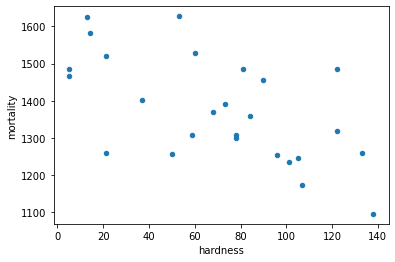

In [45]:
df_water_south.plot(kind='scatter', x='hardness', y='mortality') # точечный график

Точечный график иллюстрирует отсутствие и в южных городах зависимости между жёсткостью воды и средней годовой смертностью.

In [71]:
df_water_south[['hardness', 'mortality']].corr() # коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [72]:
df_water_south[['hardness', 'mortality']].corr(method='spearman') # коэффициент корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


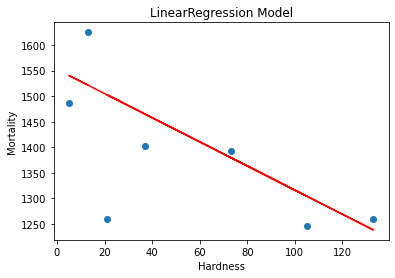

In [73]:
X_s = df_water_south[['hardness']]
y_s = df_water_south['mortality']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.25, random_state=60)

model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

ys_pred = model_s.predict(Xs_test)

plt.scatter(Xs_test, ys_test)
plt.title('LinearRegression Model')
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.plot(Xs_test, ys_pred, c='r') # модель линейной регрессии

In [74]:
model_s.score(Xs_test, ys_test) # коэффициент детерминации

0.3219903203605686

Text(0, 0.5, 'Residuals')

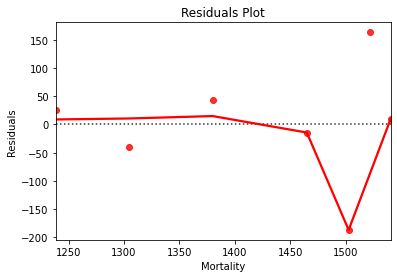

In [75]:
sns.residplot(x=ys_pred, y=ys_test, lowess=True, color="r") # график остатков
plt.title('Residuals Plot')
plt.xlabel('Mortality')
plt.ylabel('Residuals')

Вывод по южным городам аналогичен выводу по северным.